In [1]:
import os
import sys
sys.path.append(os.path.abspath('/home/cuiyf/myalphasim/'))
from cuiyf_op.visualization import simsummary, bcorr, visual_summary, checkcorr, plot_group_ret, visual_report, ts_visual_report, corr_heatmap
from cuiyf_op import cuiyfOp

In [2]:
cmp_paths = ["/home/cuiyf/myalphasim/Basic/pnl/",
              "/home/cuiyf/myalphasim/Barra/pnl/",
              "/home/cuiyf/myalphasim/myalphas/week1/pnl/",
              "/home/cuiyf/myalphasim/myalphas/week2/pnl/",
              "/home/cuiyf/myalphasim/myalphas/week3/pnl/",
              "/home/cuiyf/myalphasim/myalphas/week4/pnl/",
              "/home/cuiyf/myalphasim/myalphas/week5/pnl/",
              "/home/cuiyf/myalphasim/myalphas/week6/pnl/",
              "/home/cuiyf/myalphasim/myalphas/week9/pnl/"
              ]
mypaths = [#"/home/cuiyf/myalphasim/myalphas.bk/week1/pnl/",
              #"/home/cuiyf/myalphasim/myalphas.bk/week2/pnl/",
              "/home/cuiyf/myalphasim/myalphas.bk/week3/pnl/",
              "/home/cuiyf/myalphasim/myalphas.bk/week4/pnl/",
              "/home/cuiyf/myalphasim/myalphas.bk/week5/pnl/",
              "/home/cuiyf/myalphasim/myalphas.bk/week6/pnl/"
              ]
# corr_heatmap(mypaths)

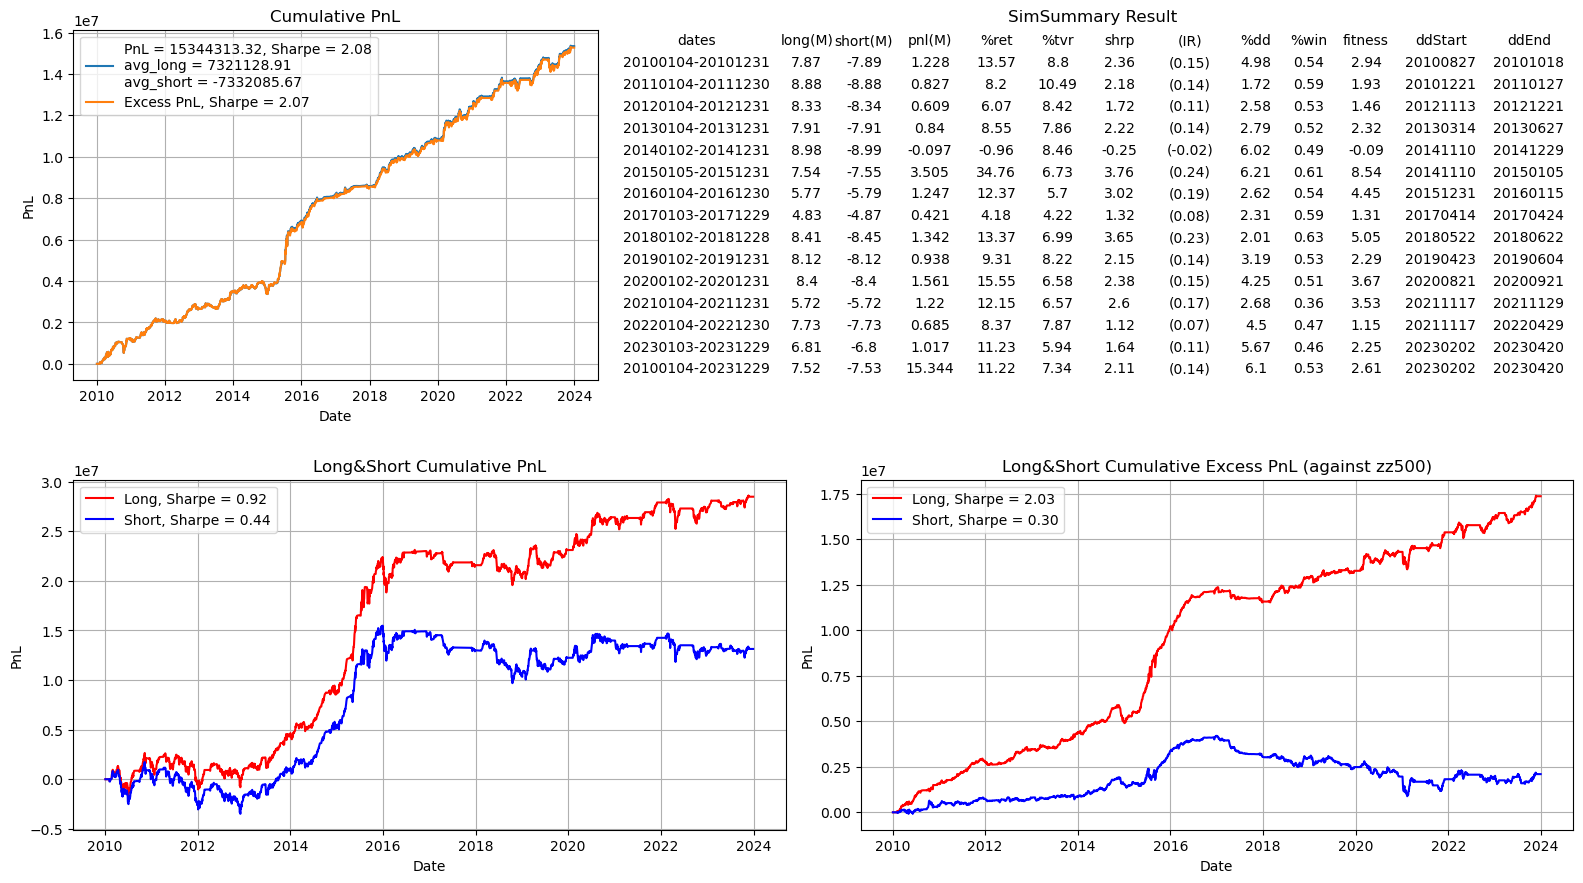

In [3]:
pnl_path = "/home/cuiyf/myalphasim/myalphas/week9/pnl/alpha.SectorFallRebound"
# visual_summary(pnl_path, cmp_paths)
# visual_report(pnl_path, cmp_paths)
ts_visual_report(pnl_path, cmp_paths)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
def plot_alphavalue(path):
    values = []
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip().split(" ")
            line = [float(x.strip()) for x in line if len(x.strip())>0]
            values.extend(line)
    values = pd.Series(np.array(values))
    print("t-test: %f, p-value: %f"%(values.mean()/values.std()*np.sqrt(len(values)), stats.t.cdf(values.mean()/values.std()*np.sqrt(len(values)), len(values)-1)))
    plt.figure()
    plt.hist(values, bins=100, label = "mean: %.4f\nstd: %.4f\nmax: %.4f\nmin: %.4f\nskew: %.4f\nkurt: %.4f"%(values.mean(), values.std(), values.max(), values.min(), values.skew(), values.kurt()))
    plt.legend()
    plt.show()

In [5]:
# valuepath = pnl_path.replace("pnl", "alpha_values")
# plot_alphavalue(valuepath)

In [6]:
bcorr(pnl_path, cmp_paths)

/home/cuiyf/myalphasim/Basic/pnl:
    alpha.MeanAmount                : 0.341675
    alpha.20dr                      : 0.171456
    alpha.5dr                       : 0.069267
    alpha.CorrCloseAmount           : -0.095027
/home/cuiyf/myalphasim/Barra/pnl:
    alpha.BarraSize                 : 0.347717
    alpha.BarraNonLinearSize        : 0.347710
    alpha.BarraPositiveVolatility   : 0.048480
    alpha.BarraPositiveLiquidity    : 0.000620
    alpha.BarraBeta                 : -0.006587
    alpha.BarraMomentum             : -0.064297
/home/cuiyf/myalphasim/myalphas/week1/pnl:
    alpha.VwapReversion             : 0.103622
    alpha.VwapNeutral               : 0.054935
    alpha.VwapClose                 : -0.027829
    alpha.PVcorr                    : -0.031814
    alpha.Volatility                : -0.034814
    alpha.VolumeDiff2               : -0.057639
    alpha.Momentum                  : -0.099111
/home/cuiyf/myalphasim/myalphas/week2/pnl:
    alpha.VolumeSkew                : 0

In [7]:
def checkcorrAPI(pnl_path):
    os.system("bcorr %s /data/share/poolpnl/* 2 2 |sort -u -g -k 1 |tail -n 10"%(pnl_path))

In [8]:
checkcorrAPI(pnl_path)

/usr/local/bin/bcorr:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr as pr


+0.222796  /data/share/poolpnl/39e4cb64
+0.225128  /data/share/poolpnl/84d3224c
+0.241386  /data/share/poolpnl/cf44a819
+0.245504  /data/share/poolpnl/7758794c
+0.247899  /data/share/poolpnl/f136bfbf
+0.252780  /data/share/poolpnl/228fb187
+0.262786  /data/share/poolpnl/309914c9
+0.271867  /data/share/poolpnl/a74e9549
+0.290707  /data/share/poolpnl/f5ed7f9a
+0.468757  /data/share/poolpnl/716b40bd
